In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

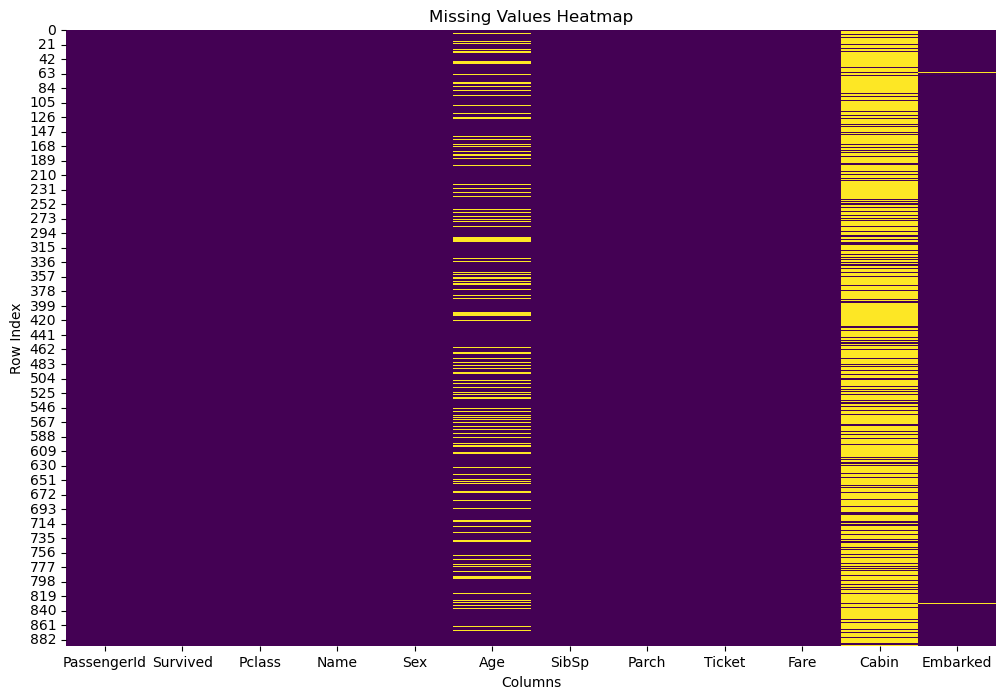

In [36]:
#Visualizing missing value using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel("Row Index")
plt.show()

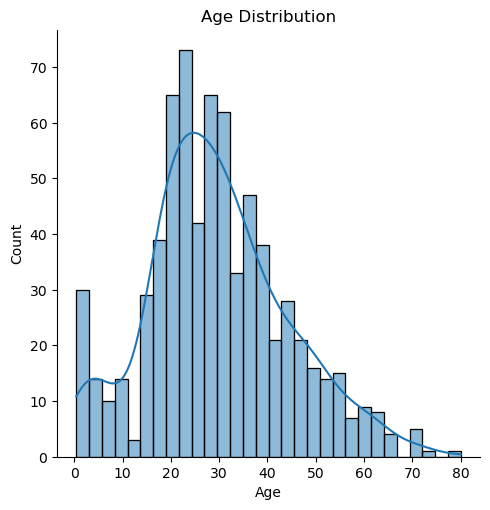

In [18]:
#Distribution (Age)
sns.displot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

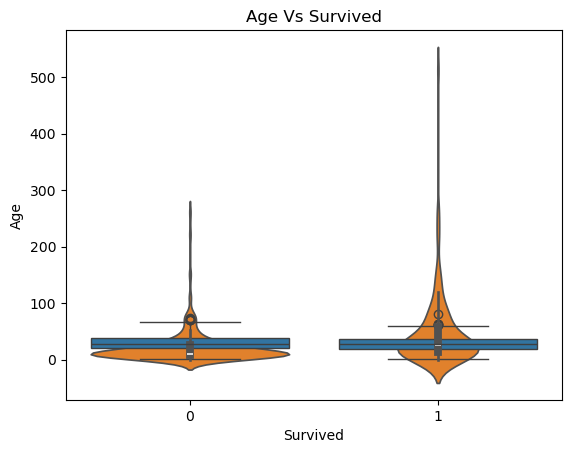

In [24]:
#Age vs Survived-Box plot
sns.boxplot(x='Survived', y='Age', data=df)
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Age Vs Survived')
plt.show()

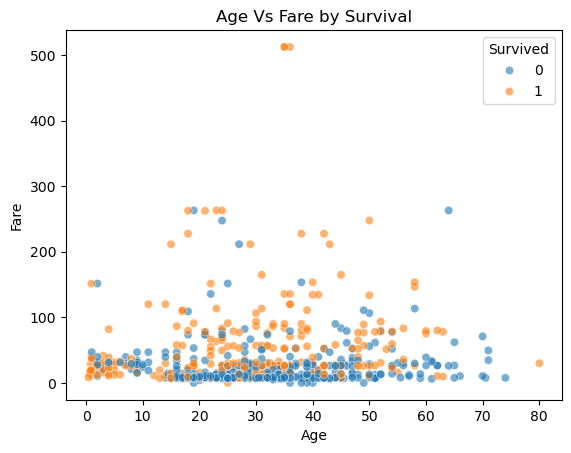

In [26]:
#Scatter: Age vs Fare by survived
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', alpha=0.6)
plt.title('Age Vs Fare by Survival')
plt.show()

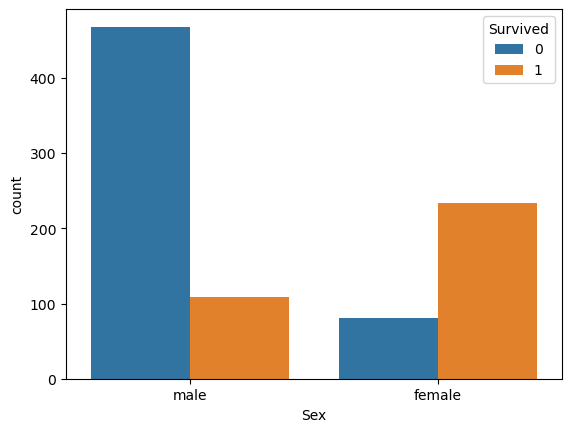

In [28]:
#Gender and survived=Countplot
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

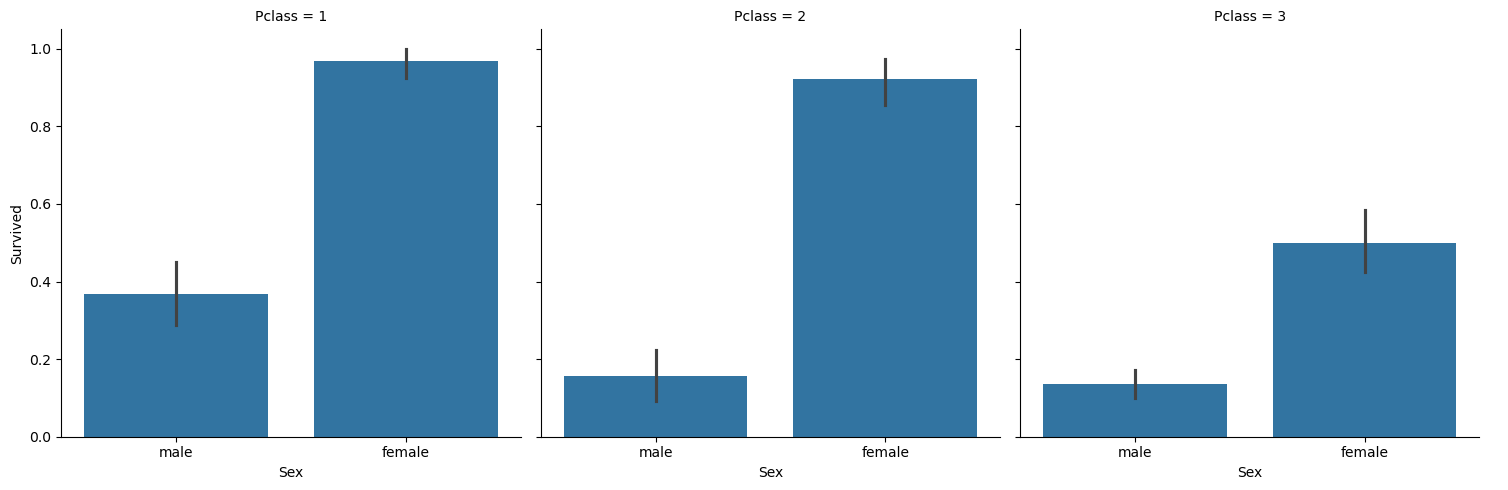

In [32]:
#Gender Vs Survived by class-catplot
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df, kind='bar')
plt.show()

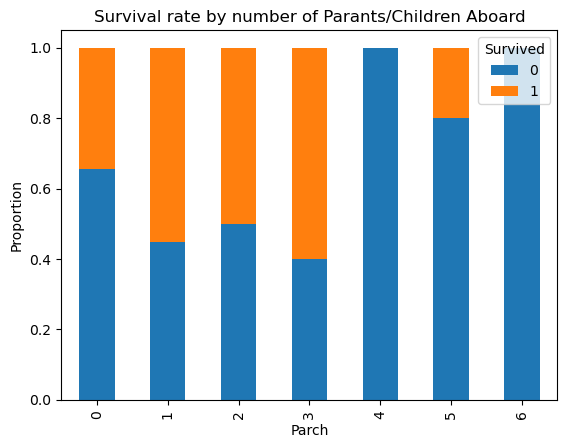

In [34]:
#Stacked survival rates:parch
ct = pd.crosstab(df['Parch'], df['Survived'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('Survival rate by number of Parants/Children Aboard')
plt.show()

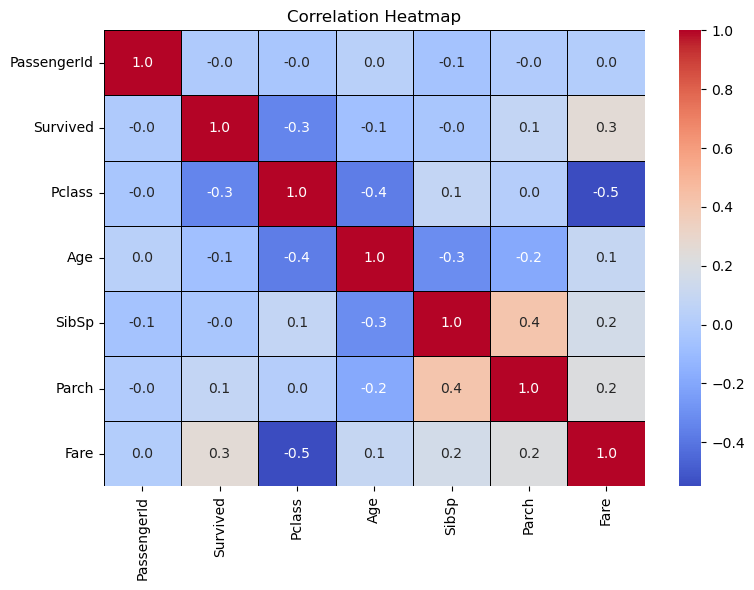

In [38]:
#Correlation Heatmap to check the variable relationship
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [46]:
#performing grouping
#Survival rate by Gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [48]:
#survival rate by Passenger class
df.groupby('Pclass')['Survived'].mean().sort_values()

Pclass
3    0.242363
2    0.472826
1    0.629630
Name: Survived, dtype: float64

In [58]:
#Multi-level Aggregation(Sex + Class)
df.groupby(['Sex', 'Pclass'])['Survived'].agg('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [64]:
#Groupby with muliple aggrgates
df.groupby(['Pclass', 'Embarked'], observed=True).agg({
    'Fare': ['mean', 'max', 'min'],
    'Age': ['mean', 'std', 'count']
})

Fare                           Age                 
                       mean       max      min       mean        std count
Pclass Embarked                                                           
1      C         104.718529  512.3292  26.5500  38.027027  14.243454    74
       Q          90.000000   90.0000  90.0000  38.500000   7.778175     2
       S          70.364862  263.0000   0.0000  38.152037  15.315584   108
2      C          25.358335   41.5792  12.0000  22.766667  10.192551    15
       Q          12.350000   12.3500  12.3500  43.500000  19.091883     2
       S          20.327439   73.5000   0.0000  30.386731  14.080001   156
3      C          11.214083   22.3583   4.0125  20.741951  11.712367    41
       Q          11.183393   29.1250   6.7500  25.937500  16.807938    24
       S          14.644083   69.5500   0.0000  25.696552  12.110906   290

In [66]:
#Analyzing outliers by Fare
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
IQR = q3-q1
outliers = df[(df['Fare']<q1-1.5*IQR) | (df['Fare']>q3+1.5*IQR)]
print("Outliers in Fare:\n", outliers[['Fare']])

Outliers in Fare:
          Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [68]:
#Skewness before transformation
cols = ['Age', 'Fare'] #by age and fare
print("Skewness before transformations:")
print(df[cols].skew(), "\n")

Skewness before transformations:
Age     0.389108
Fare    4.787317
dtype: float64 



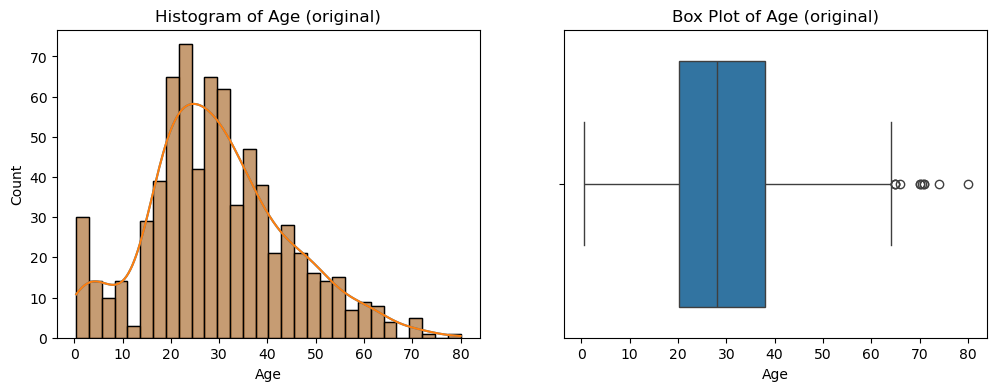

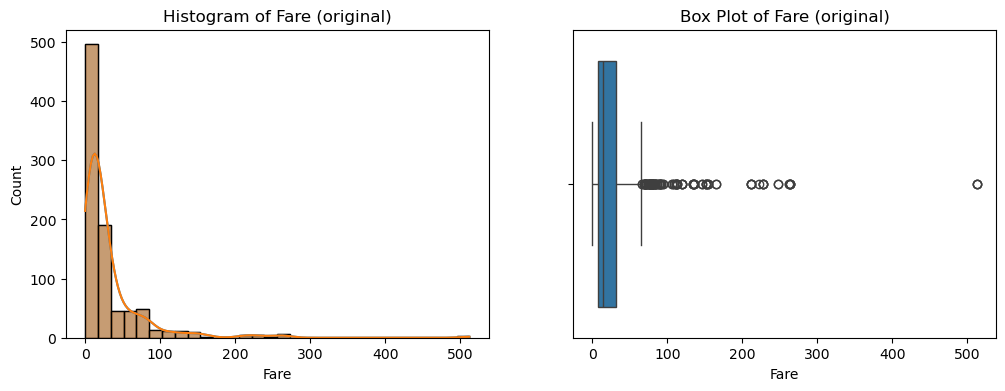

In [77]:
#Visualize raw distributions and outliers
for col in cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (original)')

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col} (original)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (original)')
    plt.show()

In [87]:
#Applying log transformation to fare
import numpy as np
df['fare_log1p'] = np.log1p(df['Fare'])

#Square root transformation of Age
df['age_sqrt'] = np.sqrt(df['Age'])

#Skewness after transformation
print("Skewness after transformations:")
print("fare_log1p:", df['fare_log1p'].skew())
print("age_sqrt:", df['age_sqrt'].skew(), "\n")

Skewness after transformations:
fare_log1p: 0.3949280095189306
age_sqrt: -0.6609802729981862 



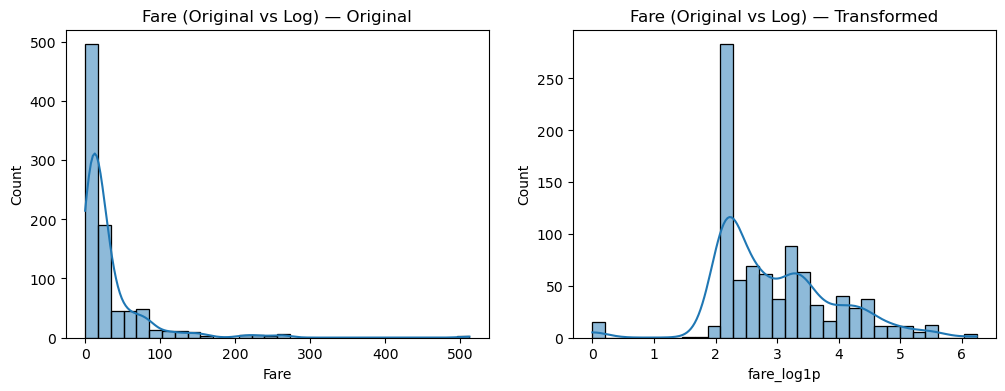

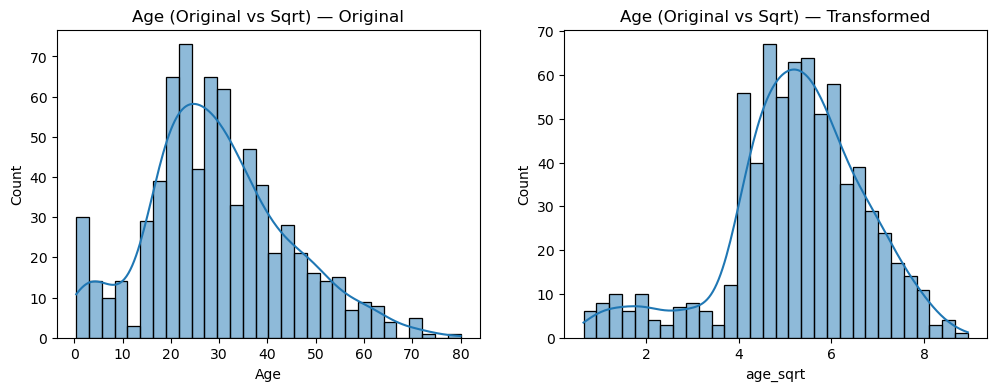

In [89]:
#Visual comparisons post-transform
for original, transformed, name in [
    ('Fare', 'fare_log1p', 'Fare (Original vs Log)'),
    ('Age', 'age_sqrt', 'Age (Original vs Sqrt)')
]:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[original], kde=True, bins=30)
    plt.title(f'{name} — Original')

    plt.subplot(1, 2, 2)
    sns.histplot(df[transformed], kde=True, bins=30)
    plt.title(f'{name} — Transformed')

    plt.show()
